# The Problem
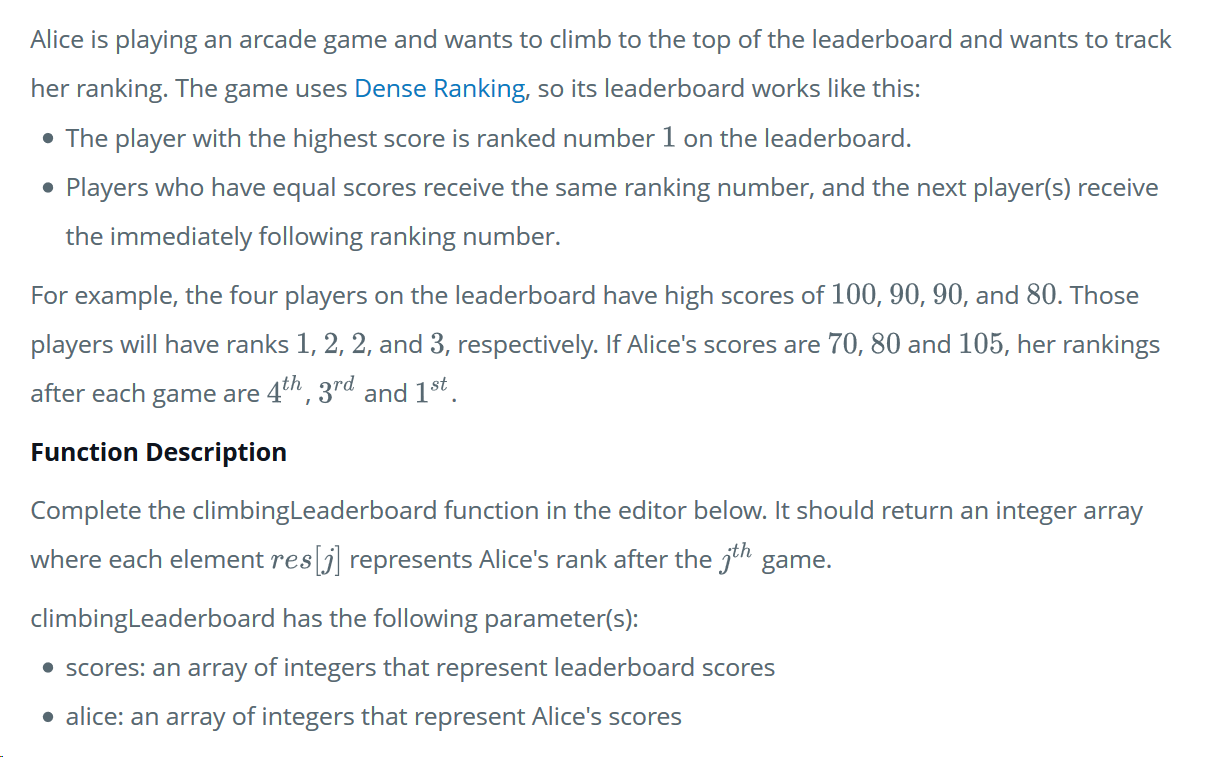

# The Solution

**Note: Did not initially notice the constraint that Alice's score are always in ascending order. This code assumes they are in any order. A simpler solution is to use `bisect_right`**

Two different data structures so each operation is as fast as possible. If python had a `SortedSet` or something similar, that would work, but instead using a `set` and `list` and ensuring they always contain the same items is the next best thing.

`set` allows `O(1)` `in` checks, and keeping a `list` sorted with `bisect` insertions if it is a new score allows for fast updates:

In [1]:
from bisect import bisect

sample_board = [100, 100, 50, 40, 40, 20, 10]
sample_scores = [5, 25, 50, 120]

def gen_rankings(board, scores):
    leaderboard = set(board)
    sortedleaderboard = sorted(leaderboard)
    for score in scores:
        if score in leaderboard:
            asc_index = sortedleaderboard.index(score)
        else:
            leaderboard.add(score)
            index = bisect(sortedleaderboard, score)
            sortedleaderboard.insert(index, score)
            asc_index = index
        yield len(sortedleaderboard) - asc_index

[ranking for ranking in gen_rankings(sample_board, sample_scores)]

[6, 4, 2, 1]

In [2]:
def climbingLeaderboard(scores, alice):
    return [
        ranking 
        for ranking in gen_rankings(scores, alice)
    ]

climbingLeaderboard(sample_board, sample_scores)

[6, 4, 2, 1]